# Introduction to Functions in R 
## -- DataCamp - R Programmer - Course 10 --

 **Note**

To use this code, select the R environment in Anaconda
 
 **Used packages**
 - tidyverse
 - assertive
 - broom
 - zeallot
 
**Table of content**
- [&nbsp;&nbsp;1. How to write functions](#toc_852741_1)
- [&nbsp;&nbsp;2. Function arguments](#toc_852741_2)
    - [&nbsp;&nbsp;2.1  Default arguments](#toc_852741_2.1)
    - [&nbsp;&nbsp;2.2  Ellipsis](#toc_852741_2.5)
    - [&nbsp;&nbsp;2.3  Checking arguments](#toc_852741_2.3)
    - [&nbsp;&nbsp;2.4  Parsing, deparsing and expressions](#toc_852741_2.4)
- [&nbsp;&nbsp;3. Returning values from functions](#toc_852741_3)
    - [&nbsp;&nbsp;3.1 Return value](#toc_852741_3.1)
    - [&nbsp;&nbsp;3.2 Attributes](#toc_852741_3.2)
- [&nbsp;&nbsp;4. Scope and precendence](#toc_852741_4)
    - [&nbsp;&nbsp;4.1 Environments](#toc_852741_4.1)
    - [&nbsp;&nbsp;4.2 Scope and precendence](#toc_852741_4.2)

**Set environment and plot size**

In [1]:
options(repr.plot.width=7, repr.plot.height=7) # controls display format
suppressMessages(library(tidyverse))
suppressMessages(library(assertive))
suppressMessages(library(broom))
suppressMessages(library(zeallot))

Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer

<a name="toc_852741_1"></a>
## 1.   How to write functions

Writing custom functions are very helpful to avoid code repetition. Can reduce workload, copy errors etc.

<u>Syntax:</u>

```R
my_fun <- function(arg1, arg2){
    body
}
```

- `function(arg1, arg2)` $\leftarrow$ this line is called the function's **signature**. It contains the `function()` function and our **argument** list.
- **body** $\leftarrow$ The space between the `{}` is called the body of the function

<u>Some best practices:</u>
- All function names should contain a verb
- All function names should be self-explanatory
- The argument list order matters! Always start with **data arguments** (what you compute on) followed by the **detail arguments** (how you perform the computation). This makes it **pipe friendly**.
- Function body should be started with custom error messages.

**Basics of converting scripts into functions**

The general steps:
- Make a function template
- Paste the script that we want to convert to a function to the body
- Choose the arguments
- Replace specific values with argument names
- Make specific variable names more general so it will work for many situations
- Remove a final assignment

In [2]:
# Create a script
coin_sides <- c("head", "tail")

sample(coin_sides, 5, replace = TRUE)

[1] "head" "head" "tail" "tail" "tail"

In [3]:
# Paste your script into the function body
toss_coin <- function() {
  sample(coin_sides, 5, replace = TRUE)
}

# Call your function
toss_coin()

[1] "tail" "head" "head" "head" "head"

In [4]:
# Update the function to return n coin tosses
toss_coin <- function(n) {
  coin_sides <- c("head", "tail")
  sample(coin_sides, n, replace = TRUE)
}

# Generate 10 coin tosses
toss_coin(10)

[1] "tail" "head" "tail" "head" "head" "tail" "tail" "head" "head" "head"

**Creating wrapper functions**

In [5]:
run_linear_regression <- function(data, formula){
    lm(formula, data)
    }

☝️ the `lm()` function does not follow function best practices and is not pipe-friendly. We can write a **wrapper function** to make it easier to use.

In [34]:
get_reciprocal <- function(x) {
  1 / x
}

# Write a function to calculate the harmonic mean
calc_harmonic_mean <- function(x)  {
  x %>%
    get_reciprocal %>%
    mean() %>%
    get_reciprocal
}

calc_harmonic_mean(c(1,5,4,7))

[1] 2.511211

<a name="toc_852741_2"></a>
## 2.  Function arguments

When looking at a funcition's arguments with `args()` we can see many different argument types.
- Required arguments - just the argument name is mentioned in the signature
- Default (optional) arguments - the argument name  in the signature followed by a `= <value>`
    - arguments with pre-defined default values (numerical, logical etc.)
    - **NULL default**  $\leftarrow$ a NULL default means that there is special handling of the argument that is too complicated to include in the function signature, and that you ought to read the documentation
    - **Categorical vector defaults** $\leftarrow$ To **pass** a character vector in the signature, we need to call `match.arg()` in the body and reassigns it. If not specified, R will only choose the first vector element.
    
```R
function(cat_arg = c("choice1", "choice2")) {
  cat_arg <- match.arg(cat_arg)
}
```

<a name="toc_852741_2.1"></a>
**2.1 Default arguments**

By adding default values to arguments in the function signature, we can make them optional.

In [6]:
toss_coin <- function(n, p_head = 0.5) {
  coin_sides <- c("head", "tail")
   weight = c(p_head, 1 - p_head) 
  sample(coin_sides, n, replace = TRUE, prob = weight)
}

toss_coin(10) # p_head is optional as it had a default value
toss_coin(10, p_head = 0.9)

[1] "tail" "tail" "tail" "tail" "head" "tail" "tail" "tail" "tail" "head"

[1] "head" "head" "head" "tail" "tail" "head" "head" "tail" "head" "head"

In [53]:
#Categorical defaults
cut_by_quantile <- function(x, n = 5, na.rm = FALSE, labels = NULL, 
                            interval_type = c("(lo, hi]", "[lo, hi)")) {
  
  interval_type <- match.arg(interval_type) # Match the interval_type argument
  probs <- seq(0, 1, length.out = n + 1)
  qtiles <- quantile(x, probs, na.rm = na.rm, names = FALSE)
  right <- switch(interval_type, "(lo, hi]" = TRUE, "[lo, hi)" = FALSE)
  cut(x, qtiles, labels = labels, right = right, include.lowest = TRUE)
}

cut_by_quantile(seq(1, 20, 5))

[1] [1,4]   (4,7]   (10,13] (13,16]
Levels: [1,4] (4,7] (7,10] (10,13] (13,16]

<a name="toc_852741_2.2"></a>
**2.2 Ellipsis**

The `...` argument is called an **ellipsis** and it accepts any other arguments. 

It makes the code more flexible, however sometimes a change of argument written by another user could break the code. Whether it's better to use d...  or not depends upon how much you trust the inner function, and how stable you need your signature to be. 

In [28]:
calc_geomean <- function(x, na.rm = TRUE){
  log(x) %>%
  mean(na.rm = na.rm) %>%
  exp()
}

calc_geomean(c(12, 5, 7, 4, NA, 6))

[1] 6.319637

In [33]:
# Now do the same but with ellipsis
calc_geomean <- function(x, ...){
  log(x) %>%
  mean(...) %>%
  exp()
}

calc_geomean(c(12, 5, 7, 4, NA, 6), na.rm = TRUE, trim = 1)

[1] 6

In [75]:
ToothGrowth_mean <- function(x, ...){
    x %>%
    group_by(...) %>%
    summarize(mean(len))
    }

ToothGrowth_mean(ToothGrowth, supp, dose)

`summarise()` has grouped output by 'supp'. You can override using the
`.groups` argument.


supp,dose,mean(len)
<fct>,<dbl>,<dbl>
OJ,0.5,13.23
OJ,1.0,22.70
OJ,2.0,26.06
VC,0.5,7.98
VC,1.0,16.77
VC,2.0,26.14


<a name="toc_852741_2.3"></a>
**2.3 Checking arguments**

If the arguments are not given proper values in a function call, it is always nice to receive a useful **error message**. That code for providing the error message is called an **assertion**. Best practice is to put this at the start of the function body!

- `stop()` - Gives an error message and stops execution. Works somewhat like the `paste()` function but writes an error message
- `warning()` - Gives a warning but continues with execution

It works, but it is far too boring to write over and over in all functions. Fortunately, R has many fine packages for writing assertions, like `testthat` or `assertive`, that has a strong focus on providing clear error messages. Some useful `assertive` functions:
- `assert_is*()` - *=numeric, character, logical, integer etc. 
- `assert_all_are_positive()`  
- `has_cols()`, `has_dims()` 
- `is_existing_file()`, `is_empty_file()` 

In [35]:
calc_geomean <- function(x, na.rm = TRUE){
  if(!is.numeric(x)){
      stop("x is not a class 'numeric'; it has class '", class(x), "'.")
      }
    
  log(x) %>%
  mean(na.rm = na.rm) %>%
  exp()
}

calc_geomean(c("one", "three", "six"))

ERROR: Error in calc_geomean(c("one", "three", "six")): x is not a class 'numeric'; it has class 'character'.


In [63]:
sampler <- function(data, n){
   
  data_name <- deparse(substitute(data)) # deparse(substitute(x)) takes the argument name literally
  
  if(!exists(data_name)){
    stop("The ", data_name, " dataset does not exist. Please check again.")
  }
  
  sample(data$Species, n, replace = F)
}

sampler(iris, 2)

[1] virginica setosa   
Levels: setosa versicolor virginica

In [64]:
sampler(risi, 2)

ERROR: Error in sampler(risi, 2): The risi dataset does not exist. Please check again.


In [53]:
calc_geomean <- function(x, na.rm = TRUE){
  if(!is.numeric(x)){
      warning("x is not a class 'numeric'; it has class '", class(x), "'.")
      return(NaN)
      }
    
  log(x) %>%
  mean(na.rm = na.rm) %>%
  exp()
}

calc_geomean(c("one", "three", "six"))

Warning message in calc_geomean(c("one", "three", "six")):
"x is not a class 'numeric'; it has class 'character'."


[1] NaN

In [48]:
# Using the assertive package
calc_geomean <- function(x, na.rm = TRUE){
  assertive::assert_is_numeric(x)
  assertive::assert_all_are_positive(x)
    
  log(x) %>%
  mean(na.rm = na.rm) %>%
  exp()
}

calc_geomean(c("one", "three", "six"))

ERROR: Error in calc_geomean(c("one", "three", "six")): is_numeric : x is not of class 'numeric'; it has class 'character'.


In [46]:
calc_geomean(c(1, 5, 7, -2, 0, 3))

ERROR: Error in calc_geomean(c(1, 5, 7, -2, 0, 3)): is_positive : x contains non-positive values.
There were 2 failures:
  Position Value   Cause
1        4    -2 too low
2        5     0 too low


<a name="toc_852741_2.4"></a>
**2.4 Parsing, deparsing and expressions**

Sometimes we want to use our arguments literally and sometimes in alternative ways. The following functions can help us to tackle these tasks:
- `expression()` - creates an R object of the expression class. Evaluate it with `eval()`
- `parse()` - convert character string to R expression
- `deparse()` - converts an R expression to an R object of the character class.

<u>Expressions</u>

In [17]:
x1 <- expression(min(c(5, 12, 52)))   # Create expression in R
print(x1)
class(x1)

expression(min(c(5, 12, 52)))


[1] "expression"

In [21]:
eval(x1)  # Use eval function to evaluate expression

[1] 5

<u>Parsing</u>

`parse()` creates expressions from strings, so they can be evaluated as R code with `eval()`.

In [18]:
x2 <- "2^2"   # Create character string
x2   

[1] "2^2"

In [19]:
parse(text = x2)

expression(2^2)

In [20]:
eval(parse(text = x2))

[1] 4

In [51]:
seq = "1, 10"
by = "2"
stat <- "mean"

parseq <- paste0(stat,"(seq(",seq,", by=",by,"))")

parseq
eval(parse(text=parseq)) 

[1] "mean(seq(1, 10, by=2))"

[1] 5

<u>Deparsing</u>

In [22]:
x3 <- deparse(x2)                 # Convert expression to character
x3 

[1] "\"2^2\""

As soon as we use an argument (here `x`) inside a function, it is evaluated, so it "stops being an (unevaluated) expression" and "starts being its resulting values (evaluated expression)". To prevent this, we must capture `x` by `substitute()`. So if we want to display the inputted argument as a text, we can use the `deparse(substitute(arg)` syntax:

In [26]:
ds1 <- function(x) {
  print(deparse(substitute(x)))
}

ds1(square)

[1] "square"


A more complex use case:

In [23]:
library(tidyverse)

plot_attr <- function(data, attribute) {
 ggplot(data, aes(x = Species, y = attribute)) +  
  geom_col() +
  labs(title = paste(deparse(substitute(attribute)), "by Species")) +
  theme_classic()
}

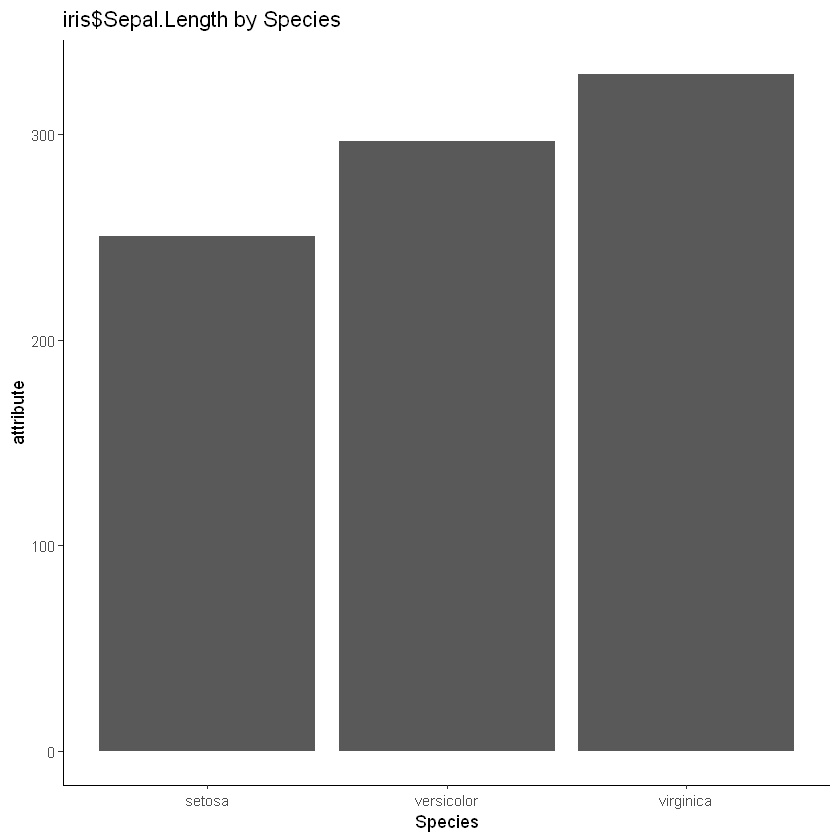

In [6]:
plot_attr(iris, iris$Sepal.Length)

<a name="toc_852741_3"></a>
## 3.  Returning values from functions

- If a function does not have a `return()` function in it, then the first executed value will be returned.
- The `return()` will stop function execution and return the value put into it. 
- If we want to return multiple values, we can assign a list as a return value. If this is not possible, we can add **attributes** to our returned object to stor additional information.
- To further use the returned object, assign the function to an object.
- Apart from the return value, any number of lines can be printed to the console.

<a name="toc_852741_3.1"></a>
**3.1 Return value**

In [59]:
is_leap_year <- function(year) {

  if(year%%400 == 0) {
    return(TRUE)
  }

  if(year%%100 == 0) {
    return(FALSE)
  }  

  if(year%%4 == 0) {
    return(TRUE)
  } 
    
  return(FALSE) # Otherwise return FALSE
}

In [66]:
is_leap_year(2022)

leap <- is_leap_year(2022)
TRUE + TRUE + leap

[1] FALSE

[1] 2

<a name="toc_852741_3.2"></a>
**3.2 Attributes**

Objects can have multiple attributes. Their name starts with `$`. 

Attributes contain the **metadata** about the result (For example, it could be the file a dataset was loaded from, the date or the username who created the variable, the number of iterations for an algorithm to converge etc.).

- `attributes()` - lists an object's attributes.
- `attr()` - list a specific attribute

<u>Extracting attributes</u>

In [85]:
attributes(iris)

$names
[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"     

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150

In [86]:
attr(iris, "names")

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [87]:
iris %>%
  group_by(Species) %>%
  attributes()

Species,.rows
<fct>,<list<int>>
setosa,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50"
versicolor,"51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100"
virginica,"101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150"


☝️ `dplyr` has a philosophy that all its functions should accept a data frame as their first argument, and return a data frame. That means that `group_by()` couldn't return a list. To comply with the package philosophy, it returned a data frame, then returned the group metadata as an attribute to that data frame. In general, you should include additional return values as attributes when you need the return value to be a particular type. If you don't have this constraint, you should return the values in a list.

In [66]:
m1 <- lm(Sepal.Length ~ Species, data = iris)
str(m1)

List of 13
 $ coefficients : Named num [1:3] 5.01 0.93 1.58
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "Speciesversicolor" "Speciesvirginica"
 $ residuals    : Named num [1:150] 0.094 -0.106 -0.306 -0.406 -0.006 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ effects      : Named num [1:150] -71.5659 0.8025 7.91 -0.3826 0.0174 ...
  ..- attr(*, "names")= chr [1:150] "(Intercept)" "Speciesversicolor" "Speciesvirginica" "" ...
 $ rank         : int 3
 $ fitted.values: Named num [1:150] 5.01 5.01 5.01 5.01 5.01 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ assign       : int [1:3] 0 1 1
 $ qr           :List of 5
  ..$ qr   : num [1:150, 1:3] -12.2474 0.0816 0.0816 0.0816 0.0816 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:3] "(Intercept)" "Speciesversicolor" "Speciesvirginica"
  .. ..- attr(*, "assign")= int [1:3] 0 1 1
  .. ..- attr(*, "contrasts")=List of 1
  .. .. ..$ Species: chr "co

In [69]:
m1$call
m1$coefficients 

lm(formula = Sepal.Length ~ Species, data = iris)

(Intercept) Speciesversicolor  Speciesvirginica 
            5.006             0.930             1.582

The `lm()` output has many attributes on different levels that are difficult to extract but we can use `broom` package to do that.

In [121]:
groom_model <- function(model) {
  list(
    model = broom::glance(model),
    coefficients = broom::tidy(model),
    observations = broom::augment(model) %>% head(2)
  )
}

# Multi-assigning the result to three variables at once
c(mdl, cff, obs) %<-% groom_model(m1)  # %<-% operator is from the zeallot package. It unpacks lists and assignes them to multiple variables

# See these individual variables
mdl
cff
obs

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6187057,0.6135181,0.5147894,119.2645,1.669669e-31,2,-111.726,231.452,243.4945,38.9562,147,150


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.006,0.07280222,68.761639,1.134286e-113
Speciesversicolor,0.930,0.10295789,9.032819,8.770194e-16
Speciesvirginica,1.582,0.10295789,15.365506,2.214821e-32


Sepal.Length,Species,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.1,setosa,5.006,0.094,0.02,0.5164896,0.0002314478,0.1844528
4.9,setosa,5.006,-0.106,0.02,0.5164734,0.0002943127,-0.2079999


<u>Creating attributes</u>

$names
[1] "speed" "dist" 

$class
[1] "data.frame"

$row.names
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

$formula
dist ~ speed
<environment: 0x0000000009f58168>


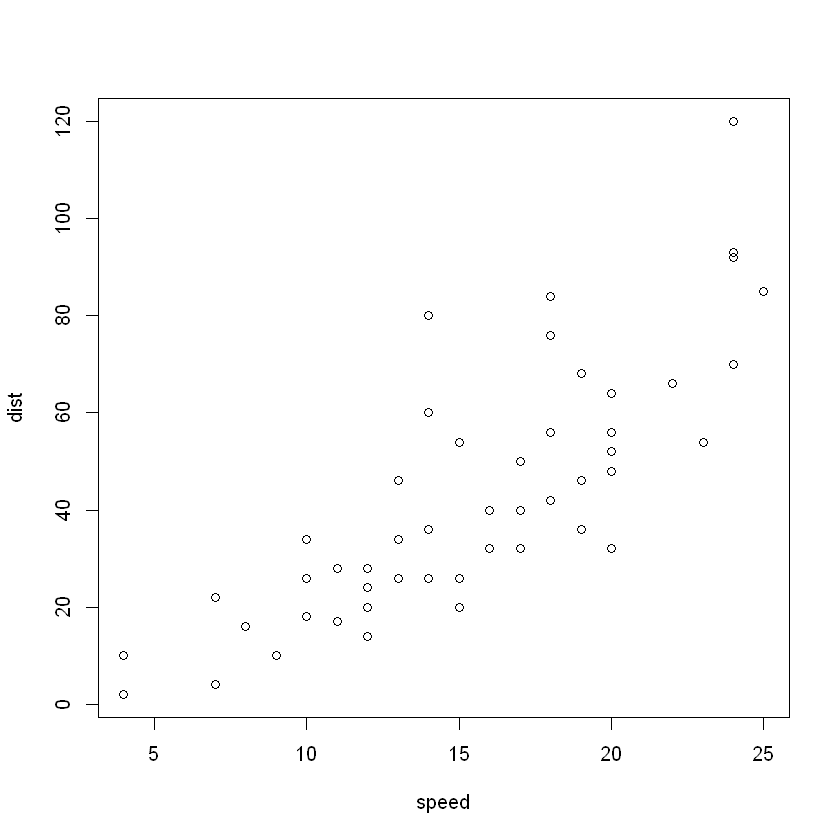

In [131]:
pipeable_plot <- function(data, formula) {
  plot(formula, data)
  attr(data, "formula") <- formula   # Add a "formula" attribute to data
  invisible(data) # do not print 
}

# From previous exercise
plt_dist_vs_speed <- cars %>% 
  pipeable_plot(dist ~ speed)

attributes(plt_dist_vs_speed)

<a name="toc_852741_4"></a>
## 4.  Scope and precendence

<u>Scope</u>

When we call a function, R gives it an **environment** to store its variables. 

```R
x_times_y <- function(x){
  x * y
}
```

With the above example, `x` will be added to the function environment, then the `x * y` calculation will be performed in that environment. However, note that there is no `y` argument to the function! So when we call the function, we get an error stating that `y` wasn't found. Let's make one small change to the code: we define y outside the function: 

```R
x_times_y <- function(x){
  x * y
}
y <- 4
```

Now the function call works. R used the same process here as we saw earlier with the exists function. When it couldn't find `y` inside the function's environment, it looked in the **parent environment**. If R was to find `y` in the function environment, it wouldn't look further in the parent environment.

After running the above code, let's try to print `x`:
```R
print(x)
```
This gives an error because `x` is being looked for in the **global environment**, but it isn't there. The function's environment isn't a parent of the global environment, it's a **child** instead. So R can't look there, which means that `x` can't be found, and you get an error.

So a function can look for variables outside its environment, but the reverse isn't true: you can't look inside the function's environment from outside.

<u>Precedence</u>
```R
x_times_y <- function(x){
  x <- 9
  y <- 6
  x * y
}

x_times_y(10)
```

Above `x` is **passed into** the function and also **defined inside** the function body. So which gets used? When the function is first called, `x` is set to 10 in the function's environment. Then, as R works through the function body, `x` is changed to 9. So values defined inside the function take **precedence** over values passed into the function, and the answer is 9 * 6 = 54.

<a name="toc_852741_4.1"></a>
**4.1 Environments**

Environments are used to store other variables. Mostly, you can think of them as lists, but there's an important extra property that is relevant to writing functions. Every environment has a **parent environment** (except the **empty** environment, at the root of the environment tree). This determines which variables R know about at different places in your code.

- `list2env()` - Creates an environment from a list
- `parent.env()` -  Find the parent environment of a given environment
- `environmentName()` - Print the environment name
- `search()` - list all active environments
- `exists()` - check if a given variable is present in the environment. First R tries to find the variable in the current environment, but if it cannot find it, it will look in the parent environment, then the grandparent environment, and so on until it finds it. If we are only interested in the current environment, we can turn off the inheritance with `inherits = FALSE`.

In [139]:
search()

[1] ".GlobalEnv"        "package:zeallot"   "package:broom"    
 [4] "package:assertive" "package:forcats"   "package:stringr"  
 [7] "package:dplyr"     "package:purrr"     "package:readr"    
[10] "package:tidyr"     "package:tibble"    "package:ggplot2"  
[13] "package:tidyverse" "jupyter:irkernel"  "package:stats"    
[16] "package:graphics"  "package:grDevices" "package:utils"    
[19] "package:datasets"  "package:methods"   "Autoloads"        
[22] "package:base"

In [142]:
rsa_lst <- list(
  capitals = c("Cape Town", "Bloemfontein", "Pretoria"),
  national_parks = c("Addo Elephant National Park", "Agulhas National Park", "Bontebok National Park"),
  popu = c(40583573, 44819778, 47390900)
)

ls.str(rsa_lst) # List the structure of each element of rsa_lst

capitals :  chr [1:3] "Cape Town" "Bloemfontein" "Pretoria"
national_parks :  chr [1:3] "Addo Elephant National Park" "Agulhas National Park" ...
popu :  num [1:3] 40583573 44819778 47390900

In [150]:
rsa_env <- list2env(rsa_lst) # Convert the list to an environment
ls.str(rsa_env) # List the structure of each variable

capitals :  chr [1:3] "Cape Town" "Bloemfontein" "Pretoria"
national_parks :  chr [1:3] "Addo Elephant National Park" "Agulhas National Park" ...
popu :  num [1:3] 40583573 44819778 47390900

In [145]:
parent <- parent.env(rsa_env) # Find the parent environment of rsa_env
environmentName(parent) # Print its name

[1] "R_GlobalEnv"

In [159]:
# Does population exist in rsa_env?
exists("popu", envir = rsa_env) 

[1] TRUE

<a name="toc_852741_4.2"></a>
**4.2 Scope and Precedence**

In [171]:
x_plus_y <- function(x) {
  x + z
}

x_plus_y(5)

ERROR: Error in x_plus_y(5): object 'z' not found


In [172]:
x_plus_y <- function(x) {
  x + z
}

z <- 2

x_plus_y(5)

[1] 7

In [173]:
x_plus_y <- function(x) {
  y <- 3
  x + y
}
y <- 7

x_plus_y(5)

print(y)
print(x)

[1] 8

[1] 7


ERROR: Error in print(x): object 'x' not found


In [176]:
x_plus_y <- function(x) {
  x <- 1
  y <- 3
  x + y
}
y <- 10

x_plus_y(5)

print(y)
print(x)

[1] 4

[1] 10


ERROR: Error in print(x): object 'x' not found
